In this file, the data is analysed to awnser the questions posed in the practicum manual.
Furthermore we will leave remarks and explanations throughout this file on the various plots as well as on any anomolies.

Firstly let us take a look at the V-I curve for the squid at room temperature.

In [1]:
from autoplot import *
import numpy as np
from scipy.optimize import curve_fit

# Even de working directory veranderen omdat de notebook in een andere map staat dan de data.
import os
os.chdir('2022_2023_round_09')

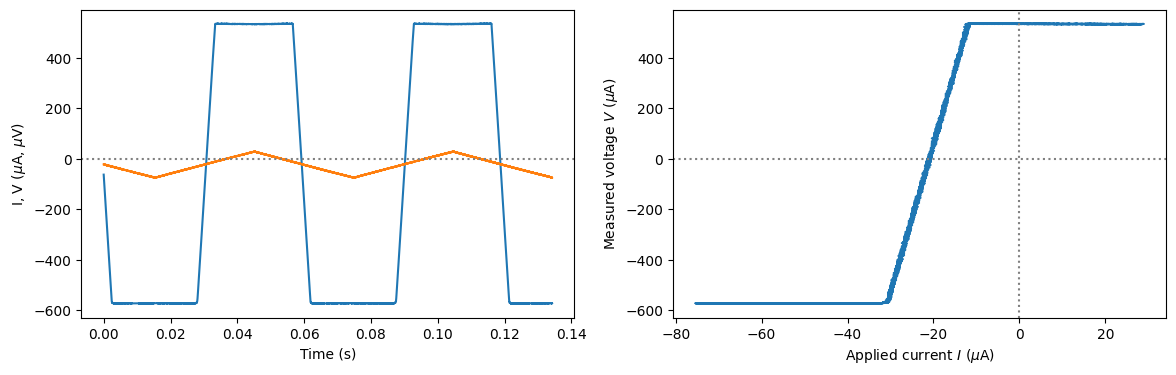

In [2]:
plot_V_I('mrsquid_V-I_2023-02-15-14_19_13.dat')

This is the first plot we saw, there is a nice linear part in the center, however at both edges, there seems to be a maximum value for the voltage. Luckily with our knowledge from the kickoff meeting we were quickly able to determine this is simply an artifact of the measurement equipment, where +-600 $\mu$V is the maximum value that can be measured.
When the amplitude is turned down to a reasonable level, this is what the V-I curve looks like at room temperature.

C:\Users\marks\AppData\Local\Temp\ipykernel_24844\2504107000.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


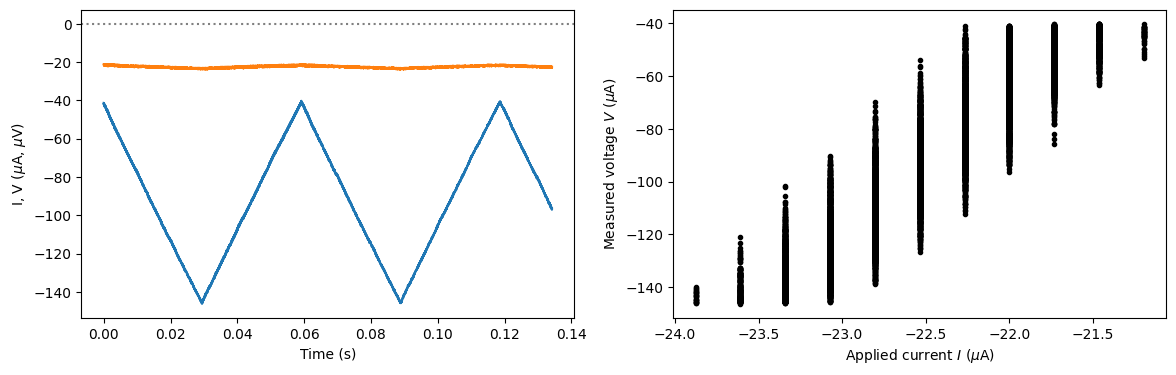

In [3]:
#plot_V_I('mrsquid_V-I_2023-02-15-14_21_22.dat')

#This code is adapted from the autoplot library found in jupyter notebook
t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_21_22.dat', unpack=True)
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_1,v_1)
plt.plot(t_1,i_1)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_1,v_1,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

This data looks very noisy. Also the measure value for the Applied current is for some reason only at certain evenly spaced values. I am currently unaware if this is caused by the electronical equipment or if there is another reason for this. I also do not know if and how this might affect an attempt at fitting a curve through these points. Since there are multiple sweeps across the measurement range, let's sort the data, and then use bin averaging, following the example set in the file called "Advanced analysis". Two runs taken two seconds apart will also be plotted together. Remember that the value given by the provided manual indicated the resistance was around 50$\Omega$ at room temperature. Firstly let's look at the second dataset.

C:\Users\marks\AppData\Local\Temp\ipykernel_24844\2036732551.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


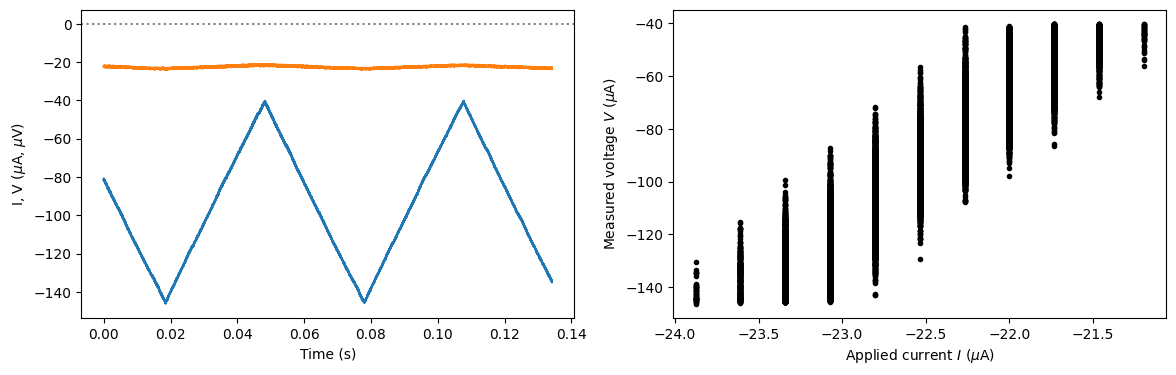

C:\Users\marks\AppData\Local\Temp\ipykernel_24844\2036732551.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


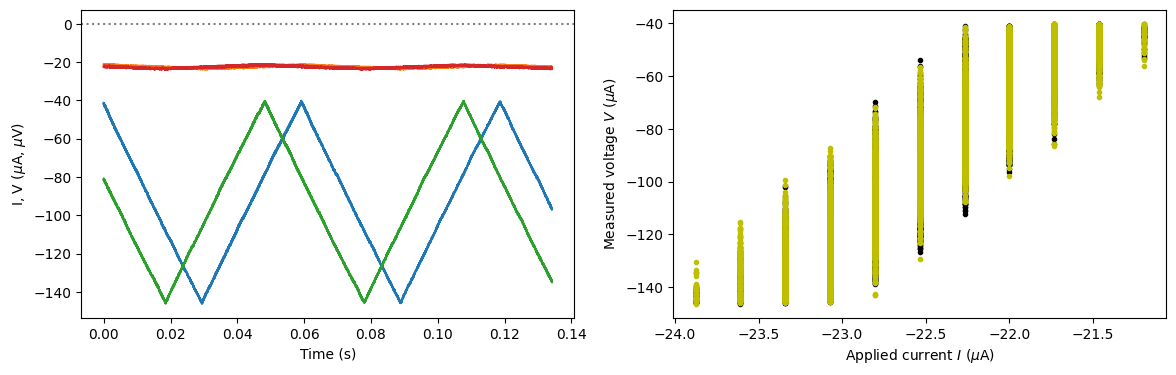

In [4]:
#plot_V_I('mrsquid_V-I_2023-02-15-14_21_22.dat')

#This code is adapted from the autoplot library found in jupyter notebook
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_21_24.dat', unpack=True)
#Firstly let's look at the other dataset
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_2,v_2)
plt.plot(t_2,i_2)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_2,v_2,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()
#Plotting the two sets on top of eachother to check they are similar
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t_1,v_1)
plt.plot(t_1,i_1)
plt.plot(t_2,v_2)
plt.plot(t_2,i_2)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i_1,v_1,'k.')
plt.plot(i_2,v_2,'y.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

This set looks similar to the first one. There is however a fase difference. This might be solved by the sorting algorithm

16384 16384 32768


C:\Users\marks\AppData\Local\Temp\ipykernel_24844\3894448909.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


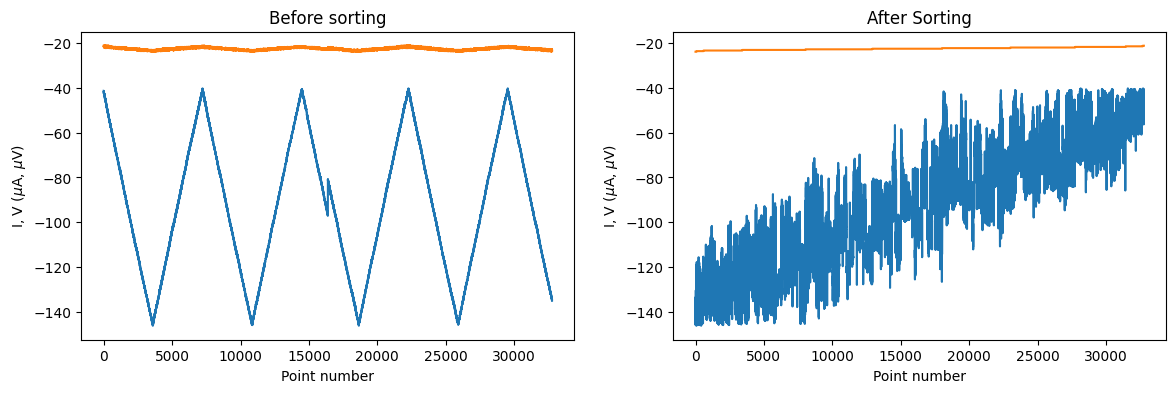

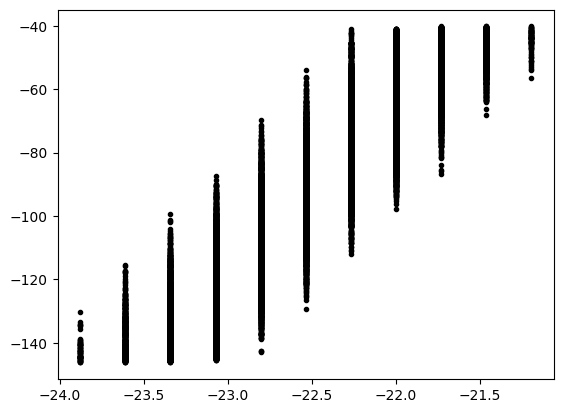

In [5]:
i_total=np.concatenate((i_1,i_2))
print(len(i_1),len(i_2),len(i_total))
v_total=np.concatenate((v_1,v_2))

# The number of points we will average together
n=2400

# This returns an array of the index order that will sort the dataset according to the applied current
ind = np.argsort(i_total)

i_s = i_total[ind]
v_s = v_total[ind]

plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(v_total)
plt.plot(i_total)
plt.xlabel("Point number")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.title("Before sorting")
plt.subplot(122)
plt.plot(v_s)
plt.plot(i_s)
plt.xlabel("Point number")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.title("After Sorting")
plt.show()

plt.figure()
plt.plot(i_s,v_s,'k.')
plt.show()

This sorted data is still very noisy, however that's nothing a little bin averaging can't help.

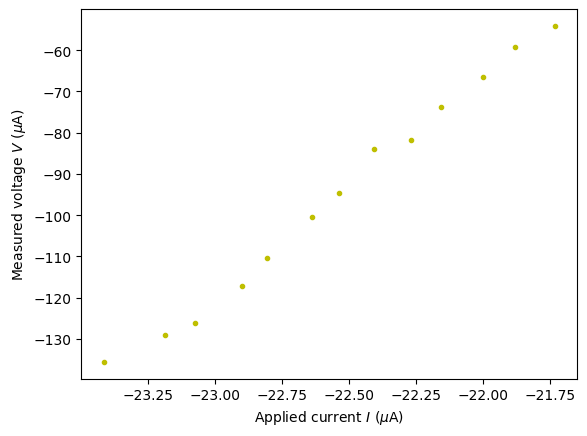

In [6]:
# An appropriate averaging code to use 
# (see https://github.com/gsteele13/gary-misc-notebooks/blob/master/Bin%20Average.md)

def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)

# We use this array to index the original arrays, and then send that to the binaverage routine
i_f = binaverage(i_s,n)
v_f = binaverage(v_s,n)

plt.plot(i_f,v_f,'y.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.show()

Trying several different numbers for the number of points per bin, the hinderence of the measurement of the current is clear. Pushing on with taking the derivative of the found points, the resistance is determined in the following cell.

c:\Users\marks\OneDrive\Documenten\dataverwerking RP-SQUID\2022_2023_round_09\figures


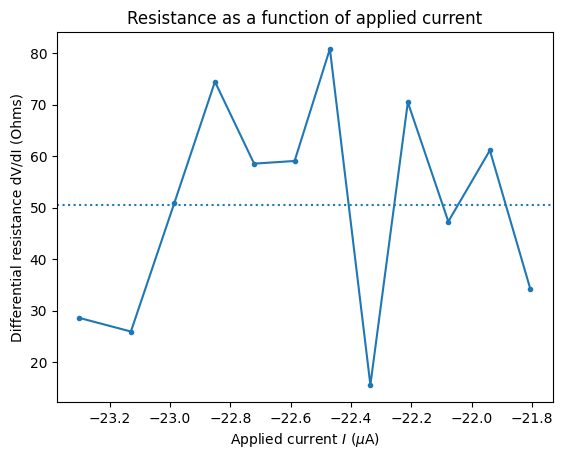

The average found resistance is  50.5955


In [7]:
# We use np.diff to make an array that calculates the difference of adjacent point
# Note that since the x-axis (i) is not uniformly gridded, we need to calculate for each 
# specific point what the difference is...
di = np.diff(i_f)
dv = np.diff(v_f)

# Now we calculate R
R = dv/di
my_path = os.path.abspath('figures')
print(my_path)
# Note that R has one less point than i: we need to define a new i vector with fewer points
# This line of code will do that and make our calculation above equivalent to the center
# difference approximation of the derivative
i_R = (i_f[1:]+i_f[:-1])/2
avg_R=np.mean(R)
plt.figure()
plt.plot(i_R,R, '.-')
plt.axhline(avg_R,ls=':')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Differential resistance dV/dI (Ohms)")
#plt.savefig('/work/figures/resistance at room temperature')
plt.title("Resistance as a function of applied current")
plt.show()
print('The average found resistance is ',round(avg_R,4))

This value is really close to the expected 50 ohms, I'd call this a succes.
Taking another approach to this question, let's use a curve fit.

[  50.46470261 1042.18111414] [0.11082342 2.49286687]


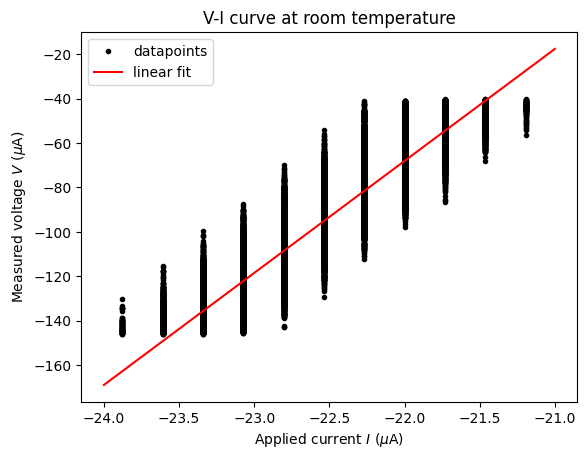

In [8]:
#i_total and v_total are the x and y values
#Let's create a linear function to fit to
def linear(x,a,b):
    return a*x+b

popt,pcov=curve_fit(linear,i_total,v_total) #other arguments to be changed for statistical uncertainty analysis
print(popt,np.sqrt(np.diag(pcov)))

x=np.linspace(-24,-21,101)

plt.figure()
plt.plot(i_total,v_total,'k.',label="datapoints")
plt.plot(x,linear(x,popt[0],popt[1]),'r',label='linear fit')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$A)")
plt.legend()
plt.title("V-I curve at room temperature")
#plt.savefig('/work/figures/resistance at room temperature curvefit')
plt.show()

Once again we find the resistance to be around 50 ohms, a little further away this time.

# I-V plot at superconducting temperature (77K)

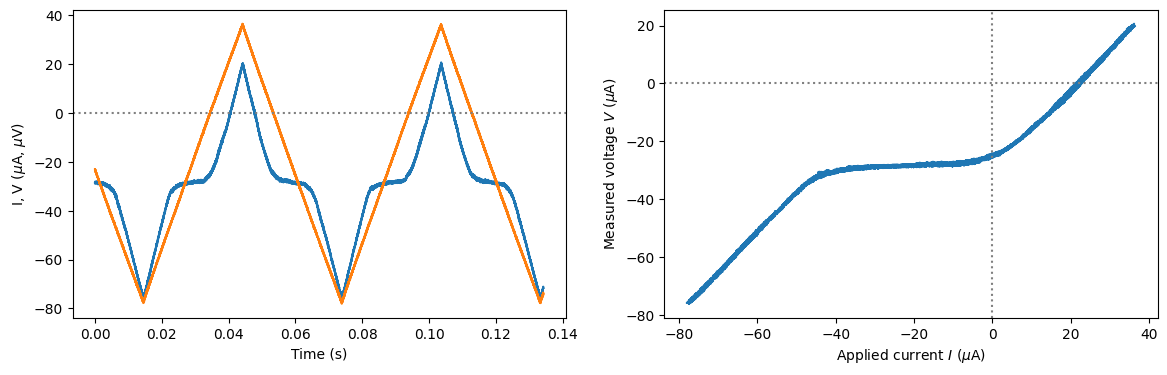

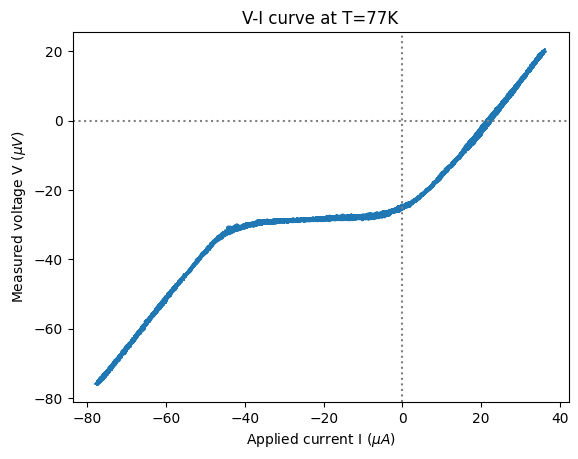

In [9]:
plot_V_I('mrsquid_V-I_2023-02-15-14_34_58.dat')
t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
plt.figure()
plt.plot(i,v)
plt.axhline(0,ls=':',c="grey")
plt.axvline(0,ls=':',c="grey")
plt.xlabel("Applied current I $(\mu A)$")
plt.ylabel("Measured voltage V $(\mu V)$")
plt.title("V-I curve at T=77K")

#plt.savefig('/work/figures/VIcurve')
plt.show()

Here we see the I-V curve at superconducting temperature. Very visible is the superconducting region on the middle,which is not super flat at first glance, and there are nice 'knees' at around -42$\mu$A and 0$\mu$A.
To find the resistance in the superconducting region, let's look at another measurement where the sweep current amplitude was decreased to ensure the applied current was less than the critical current.

C:\Users\marks\AppData\Local\Temp\ipykernel_24844\3885849493.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


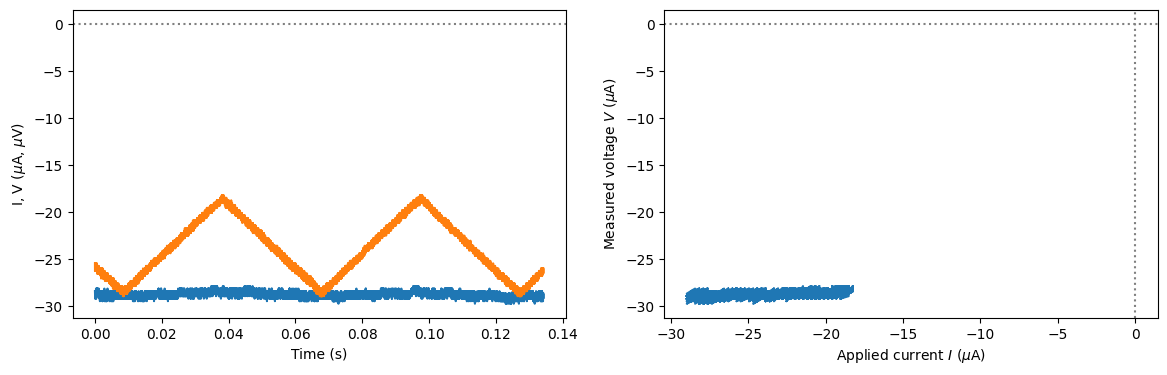

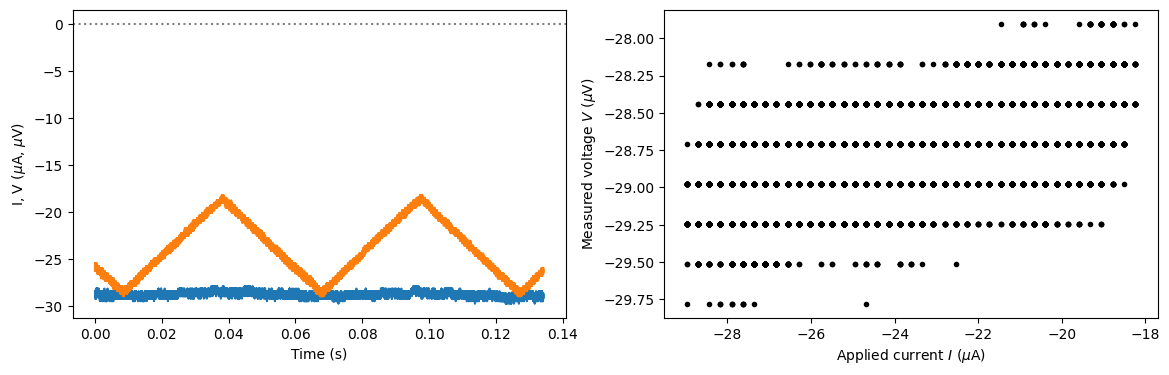

In [10]:
plot_V_I('mrsquid_V-I_2023-02-15-14_36_50.dat')

t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t,v)
plt.plot(t,i)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i,v,'k.')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.show()

Interestingly there is the opposite problem here to what happened at room temperature. There were only certain evenly spaced values measured for voltage. Once again I can only assume that this is an artifact of the measurement. Fitting a linear curve through this dataset gives the following result

[  0.04838859 -27.58575432] [0.00065797 0.01590287]


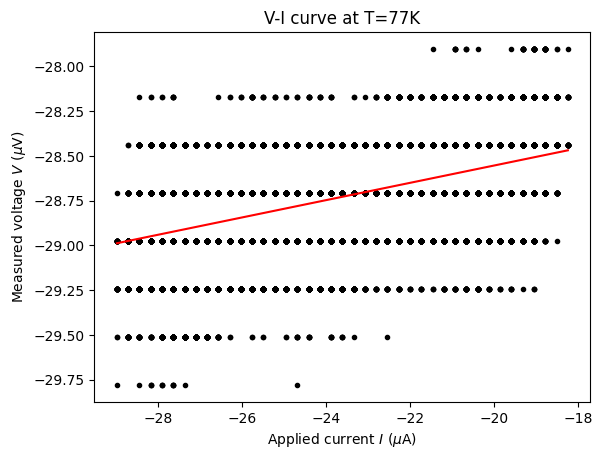

The value of the resistance at the superconducting region is  0.0484 $\pm$ 0.0007 $\Omega$


In [11]:
popt,pcov=curve_fit(linear,i,v) #other arguments to be changed for statistical uncertainty analysis
print(popt,np.sqrt(np.diag(pcov)))
R_superconduct=popt[0]
offset_superconduct=popt[1]
x=np.linspace(min(i),max(i),100)

plt.figure()
plt.plot(i,v,'k.')
plt.plot(x,linear(x,popt[0],popt[1]),'r')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.title("V-I curve at T=77K")
#plt.savefig("/work/figures/V-Isuperconcuctingzoom")
plt.show()
perr=np.sqrt(np.diag(pcov))
print("The value of the resistance at the superconducting region is ",round(popt[0],4),'$\pm$',round(perr[0],4),'$\Omega$')

Why is this not zero? This is an artifact of the measurement setup, it is possibly caused by stray resistance in wires connecting to the SQUID. An other possible source of impedance is stray inductance. The mr SQUID control box was set to oscilospoce mode, which is a reasonnalby fast sweeping mode. The length of the cables was longer than absolutely neccesary so this could be a contributing factor. A third source of interference is the cable connecting to the pt-100 which was also lowered in the liquid nitrogen. This cable was quite long which could act like an antenna. This cable is easily disconnected, so this is something keep in mind for the next experiments.

We have made a lot of measurements of the I-V curve at superconducting temperature, so let's take all these together such that the noise cancels itself while the signal adds to itself. Then, using bin averaging, the resistance can be calculated.

[1.11021371 9.61389117]
[0.00028886 0.03520899]


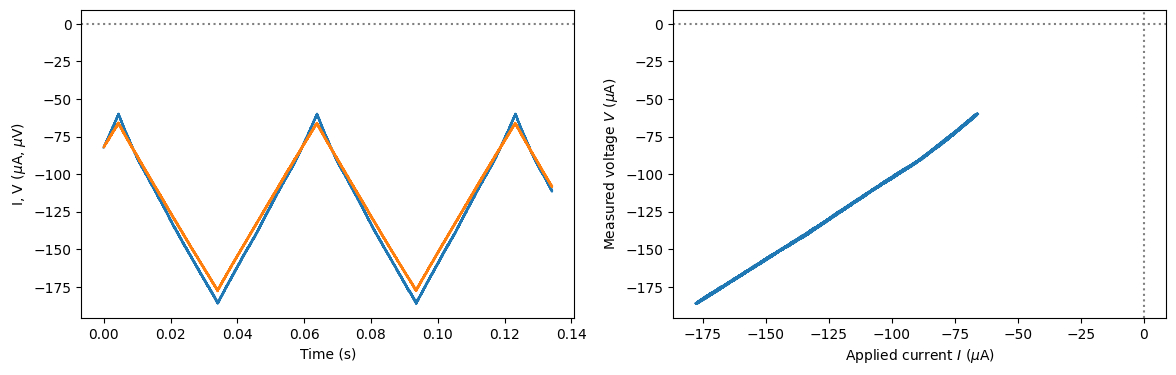

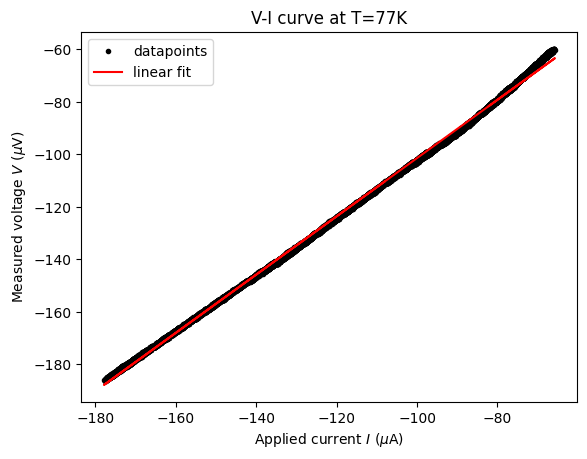

In [12]:
plot_V_I('mrsquid_V-I_2023-02-15-14_35_07.dat')
tt,ii,vv = np.loadtxt('mrsquid_V-I_2023-02-15-14_35_07.dat', unpack=True)
ppopt,ppcov=curve_fit(linear,ii,vv)
print(ppopt)
print(np.sqrt(np.diag(ppcov)))
plt.figure()
plt.plot(ii,vv,'k.',label="datapoints")
plt.plot(ii,linear(ii,*ppopt),'r',label="linear fit")
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")
plt.title("V-I curve at T=77K")
#plt.savefig("/work/figures/V-Ipostcriticalzoom")
plt.legend()
plt.show()

In [13]:
#lets load in all relevant data files

#t,i,v = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)

t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_31_41.dat', unpack=True)
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
t_3,i_3,v_3 = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
t_4,i_4,v_4 = np.loadtxt('mrsquid_V-I_2023-02-15-14_37_10.dat', unpack=True)
t_5,i_5,v_5 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_26.dat', unpack=True)
t_6,i_6,v_6 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_27.dat', unpack=True)
t_7,i_7,v_7 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_29.dat', unpack=True)
t_8,i_8,v_8 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_01.dat', unpack=True)
t_9,i_9,v_9 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_03.dat', unpack=True)
t_10,i_10,v_10 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_04.dat', unpack=True)
t_11,i_11,v_11 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_05.dat', unpack=True)
t_12,i_12,v_12 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_06.dat', unpack=True)
t_13,i_13,v_13 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_07.dat', unpack=True)
t_14,i_14,v_14 = np.loadtxt('mrsquid_V-I_2023-02-15-14_50_05.dat', unpack=True)

#lets concatenate all data together
#t_total=np.concatenate((t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14))
#i_total=np.concatenate((i_1,i_2,i_3,i_4,i_5,i_6,i_7,i_8,i_9,i_10,i_11,i_12,i_13,i_14))
#v_total=np.concatenate((v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14))
#print(len(i_total))




To analyse this dataset we are going to use the bucket filtering technique also used for the room temperature measurement.

In [14]:
# An appropriate averaging code to use 
# (see https://github.com/gsteele13/gary-misc-notebooks/blob/master/Bin%20Average.md)

#def binaverage(x, navg):
#    N = len(x) // navg
#    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)
#
## We use this array to index the original arrays, and then send that to the binaverage routine
#i_f = binaverage(i_s,n)
#v_f = binaverage(v_s,n)
#
#plt.plot(i_f,v_f,'y.')
#plt.xlabel("Applied current $I$ ($\mu$A)")
#plt.ylabel("Measured voltage $V$ ($\mu$V)")
#plt.show()

Here is a plot of the resistance as a function of the applied current. There is not a clear jump, there is more of a transition region. In blue are the calculated critical currents from later in this notebook.

# Finding the knees and the critical current

This is an explination of how the critical current is found

# Critical current for many datasets

In [15]:
t_1,i_1,v_1 = np.loadtxt('mrsquid_V-I_2023-02-15-14_31_41.dat', unpack=True)
t_2,i_2,v_2 = np.loadtxt('mrsquid_V-I_2023-02-15-14_34_58.dat', unpack=True)
t_3,i_3,v_3 = np.loadtxt('mrsquid_V-I_2023-02-15-14_36_50.dat', unpack=True)
t_4,i_4,v_4 = np.loadtxt('mrsquid_V-I_2023-02-15-14_37_10.dat', unpack=True)
t_5,i_5,v_5 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_26.dat', unpack=True)
t_6,i_6,v_6 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_27.dat', unpack=True)
t_7,i_7,v_7 = np.loadtxt('mrsquid_V-I_2023-02-15-14_46_29.dat', unpack=True)
t_8,i_8,v_8 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_01.dat', unpack=True)
t_9,i_9,v_9 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_03.dat', unpack=True)
t_10,i_10,v_10 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_04.dat', unpack=True)
t_11,i_11,v_11 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_05.dat', unpack=True)
t_12,i_12,v_12 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_06.dat', unpack=True)
t_13,i_13,v_13 = np.loadtxt('mrsquid_V-I_2023-02-15-14_47_07.dat', unpack=True)
t_14,i_14,v_14 = np.loadtxt('mrsquid_V-I_2023-02-15-14_50_05.dat', unpack=True)


In [16]:
data = {'1':[ t_1 ,i_1,v_1 ],'2':[t_2,i_2,v_2],'14':[t_14,i_14,v_14],'4':[t_4,i_4,v_4],'5':[t_5,i_5,v_5],'6':[t_6,i_6,v_6],
'7':[t_7,i_7,v_7],'8':[t_8,i_8,v_8],'9':[t_9,i_9,v_9],'10':[t_10,i_10,v_10],'11':[t_11,i_11,v_11],'12':[t_12,i_12,v_12],'13':[t_13,i_13,v_13]}


Now we have all of our data together in a dictionairy. We are going to follow the example of the advanced analysis code. The first step is to sort the data.

In [17]:
# The number of points we will average together
sorted_data=data # this values will be overwritten, just for the shape
avg_data = data # also overwritten
print(len(data))
for dataset in data:

# This returns an array of the index order that will sort the dataset according to the applied current
    ind = np.argsort(data[dataset][1]) #index 1 is the data for the current
    sorted_data[dataset][1] = data[dataset][1][ind]
    sorted_data[dataset][2] = data[dataset][2][ind]
#Hopefully this does it

13


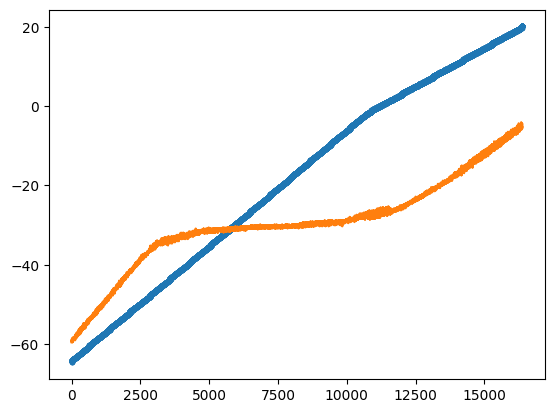

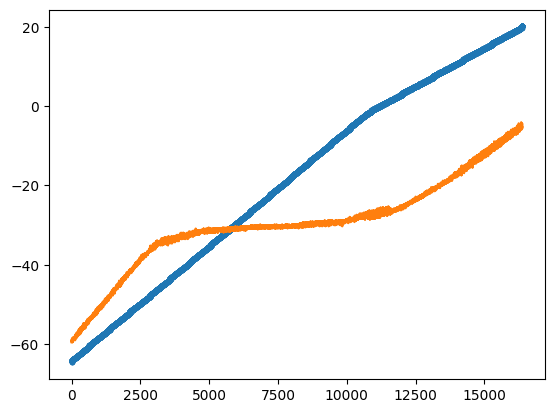

HTML	 R	 R_superconduct	 avg_R	 avg_data	 binaverage	 curve_fit	 data	 dataset	 
datetime	 di	 display	 dv	 glob	 i	 i_1	 i_10	 i_11	 
i_12	 i_13	 i_14	 i_2	 i_3	 i_4	 i_5	 i_6	 i_7	 
i_8	 i_9	 i_R	 i_f	 i_s	 i_total	 ii	 ind	 linear	 
make_latex_folder	 meas_time	 my_path	 n	 np	 offset_superconduct	 os	 pcov	 perr	 
plot_PSD	 plot_R_T	 plot_V_I	 plot_V_Phi	 plot_all_data	 plt	 popt	 ppcov	 ppopt	 
sorted_data	 t	 t_1	 t_10	 t_11	 t_12	 t_13	 t_14	 t_2	 
t_3	 t_4	 t_5	 t_6	 t_7	 t_8	 t_9	 tt	 v	 
v_1	 v_10	 v_11	 v_12	 v_13	 v_14	 v_2	 v_3	 v_4	 
v_5	 v_6	 v_7	 v_8	 v_9	 v_f	 v_s	 v_total	 vv	 
x	 


In [18]:
#lets plot one dataset
plt.figure()
plt.plot(data['1'][1],'.')
plt.plot(data['1'][2])
plt.show()
plt.figure()
plt.plot(sorted_data['1'][1],'.')
plt.plot(sorted_data['1'][2])
plt.show()
%who


Somehow that worked, lets now use bin averaging to reduce the noise a bit

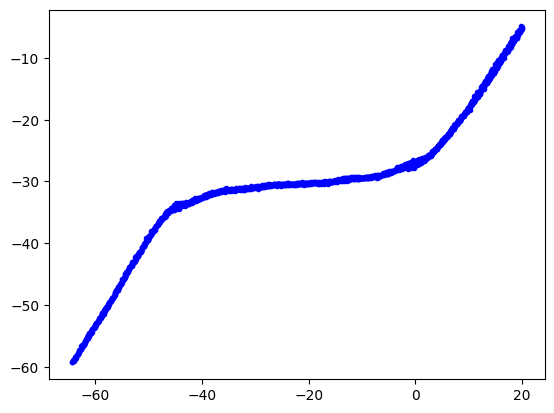

In [19]:
n=10
def binaverage(x, navg):
    N = len(x) // navg
    return np.average(np.reshape(x[0:N*navg],(N,navg)),axis=1)
for dataset in data:
    avg_data[dataset][1] = binaverage(sorted_data[dataset][1],n)
    avg_data[dataset][2] = binaverage(sorted_data[dataset][2],n)

#lets see how the data looks
plt.figure()
plt.plot(avg_data['1'][1],avg_data['1'][2],'b.')
plt.show()

The data is sorted and smoothed. Now to determine the critical currents. To do this I will do a straight line approximation for the resistive region as well as the superconducting region. the points where this is possible change so i have to note it manually

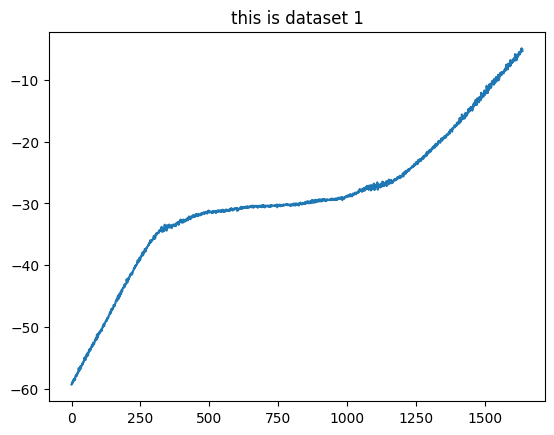

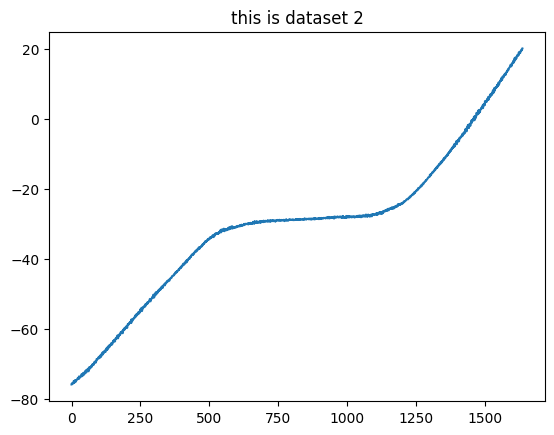

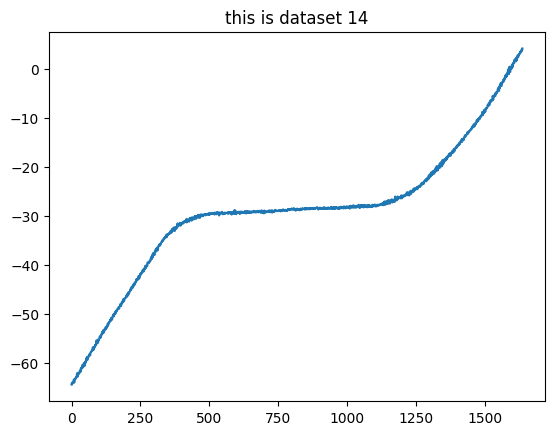

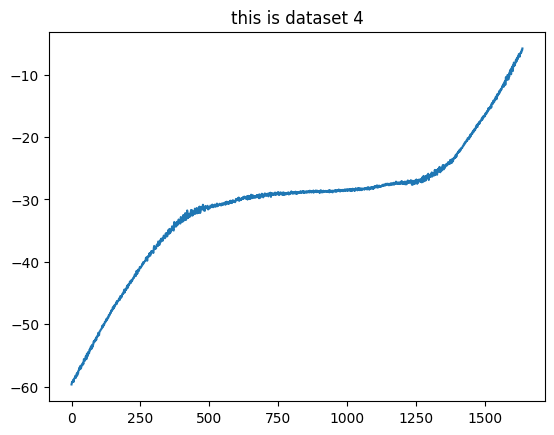

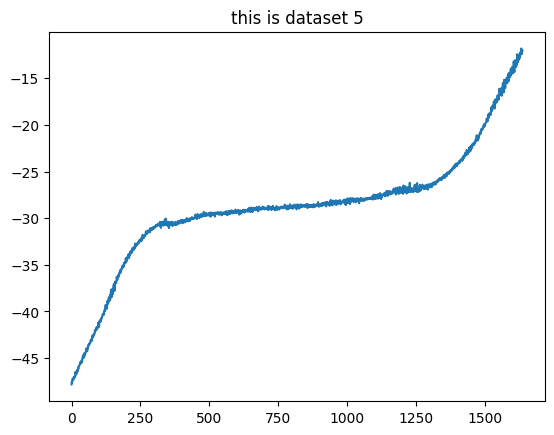

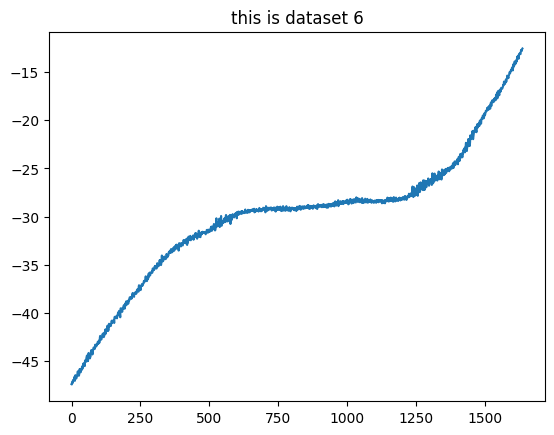

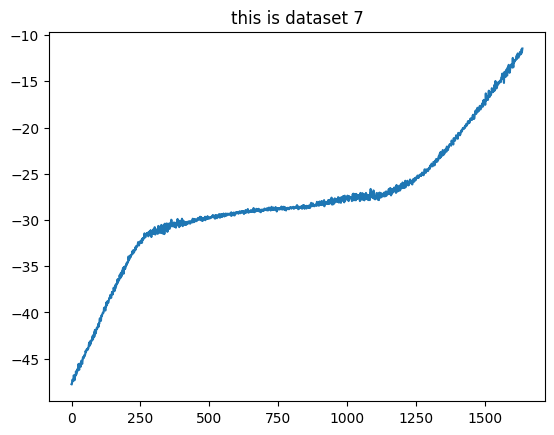

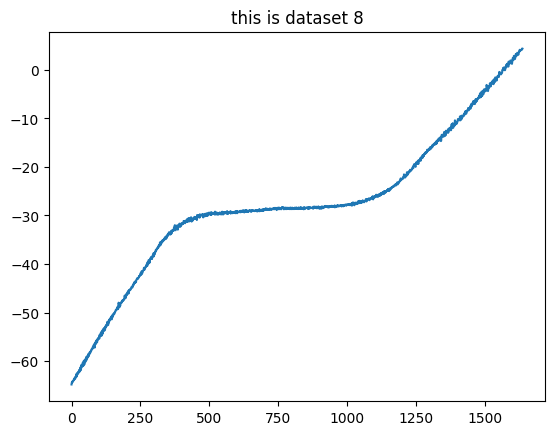

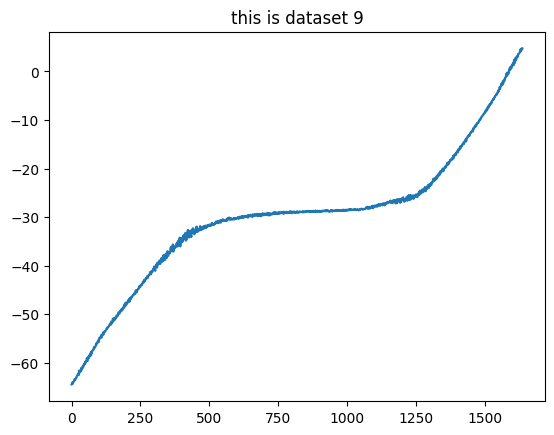

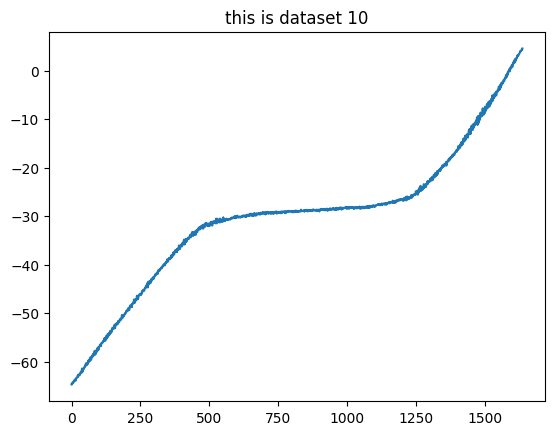

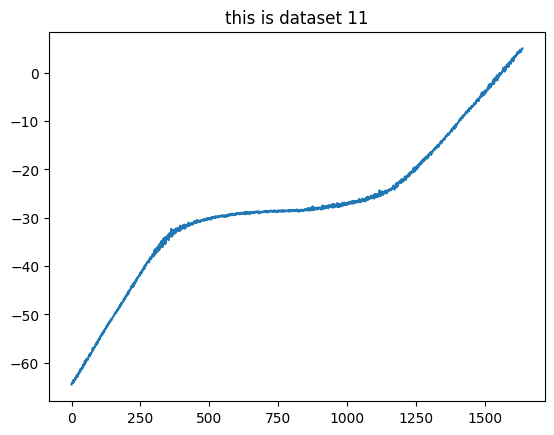

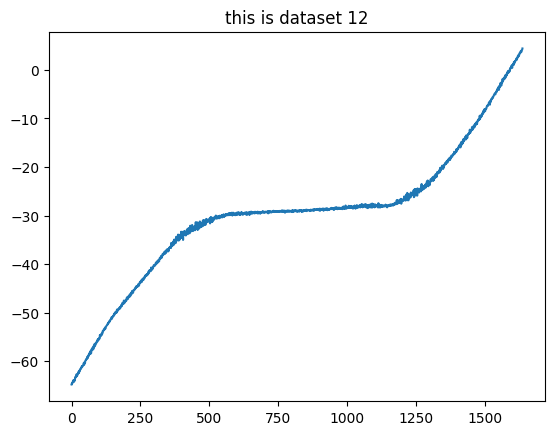

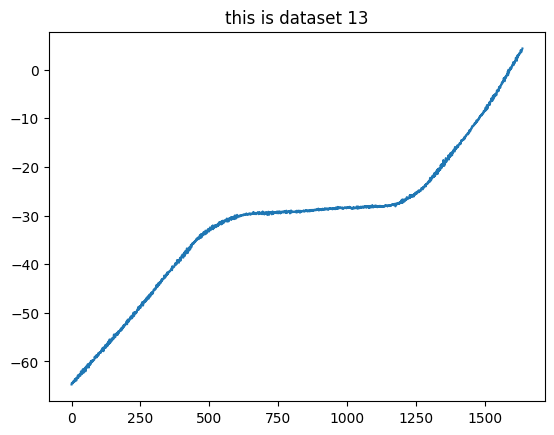

In [21]:

dataset_length = len(avg_data['1'][1]) #this is the length after the averaging
#print(dataset_length)
for key in avg_data:
    plt.figure()
    plt.plot(avg_data[key][2])
    plt.title('this is dataset ' + key)
#    doesntmatter = input() #give myself time to note the datapoints where a straight line approximation is valid
    plt.show()

In [22]:
#this assumes n=10 binaveraging
flat_regions_1={"neg":[0,300],"sc":[500,1000],"pos":[1200,1637]} #megative, superconducting , positive
flat_regions_2={'neg':[0,450],'sc':[600,1100],"pos":[1250,1637]}
flat_regions_14={'neg':[0,300],'sc':[500,1050],"pos":[1300,1637]}
flat_regions_4={'neg':[0,300],'sc':[500,1150],"pos":[1300,1637]}
flat_regions_5={'neg':[0,250],'sc':[300,1200],"pos":[1350,1637]}
flat_regions_6={'neg':[0,400],'sc':[550,1200],"pos":[1350,1637]} #this set seems rough and might not be used
flat_regions_7={'neg':[0,250],'sc':[400,1100],"pos":[1300,1637]}
flat_regions_8={'neg':[0,300],'sc':[500,1000],"pos":[1250,1637]}
flat_regions_9={'neg':[0,300],'sc':[550,1050],"pos":[1300,1637]}
flat_regions_10={'neg':[0,450],'sc':[550,1150],"pos":[1250,1637]}#here are the boundries for the linear fit
flat_regions_11={'neg':[0,250],'sc':[450,1100],"pos":[1200,1637]}
flat_regions_12={'neg':[0,320],'sc':[510,1150],"pos":[1300,1637]}
flat_regions_13={'neg':[0,450],'sc':[600,1100],"pos":[1300,1637]}
regions = {'1':flat_regions_1,'2':flat_regions_2,'14':flat_regions_14,'4':flat_regions_4,'5':flat_regions_5,'6':flat_regions_6,'7':flat_regions_7,
'8':flat_regions_8,'9':flat_regions_9,'10':flat_regions_10,'11':flat_regions_11,'12':flat_regions_12,'13':flat_regions_13}

def linear_fit(x,a,b):
    return (a*x+b)

In [23]:
popt = {}
pcov = {}

for key in avg_data:
    local_popt = {}
    local_pcov = {}
    for region in regions[key]:
        local_local_popt,local_local_pcov = curve_fit(linear ,avg_data[key][1][regions[key][region][0]:regions[key][region][1]], 
        avg_data[key][2][regions[key][region][0]:regions[key][region][1]])
        local_popt.update({region:local_local_popt})
        local_pcov.update({region:local_local_pcov})

    popt.update({key:local_popt})
    pcov.update({key:local_pcov})
print("These are the popt")
for key in popt:
    print(popt[key])
print("And these are the pcov")
#for key in pcov:
#    print(pcov[key])

#We want to know only the diagonal of the pcov
for key in pcov:
    for region in pcov[key]:
#        print(pcov[key][region])
        pcov[key][region] = np.sqrt(np.diag(pcov[key][region]))
        print(pcov[key])


These are the popt
{'neg': array([ 1.40379096, 31.04096952]), 'sc': array([  0.07637186, -28.66325903]), 'pos': array([  1.22165359, -29.93017021])}
{'neg': array([ 1.40064315, 32.64136349]), 'sc': array([  0.07318041, -26.87338529]), 'pos': array([  1.36559437, -29.79015032])}
{'neg': array([ 1.36913828, 30.34187087]), 'sc': array([  0.05308972, -27.58349933]), 'pos': array([  1.229872  , -27.91825657])}
{'neg': array([ 1.40007416, 32.59168036]), 'sc': array([  0.09345299, -26.66025941]), 'pos': array([  1.07528368, -26.28660483])}
{'neg': array([ 1.34013123, 28.88976472]), 'sc': array([  0.08793104, -26.90851531]), 'pos': array([  1.11408524, -27.07897575])}
{'neg': array([ 1.14493011, 18.65780667]), 'sc': array([  0.0561702 , -27.61697986]), 'pos': array([  0.96137962, -25.81261713])}
{'neg': array([ 1.31425387, 27.47630124]), 'sc': array([  0.08404234, -27.01401755]), 'pos': array([  1.1706286 , -27.48503512])}
{'neg': array([ 1.36701353, 30.43646749]), 'sc': array([  0.05405141, -

WOW that is a monstosity of nested dictionairies, but it is efficient in terms of code. Anyway now we have the linear approximations along with their uncertainties. This allows us to find the intersection points of the linear approximations and THEIR uncertainties which will allow us to find the critical current with a quantitative uncertainty. First let's check that the found values are good

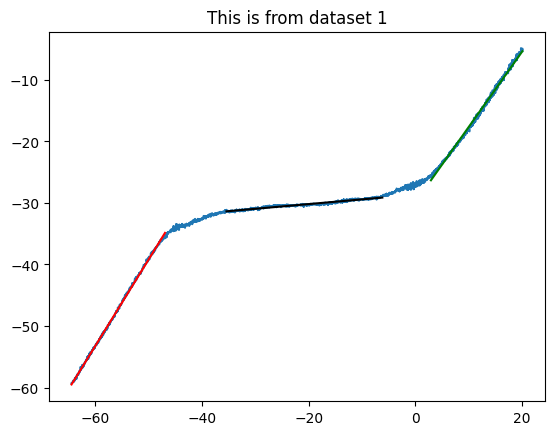

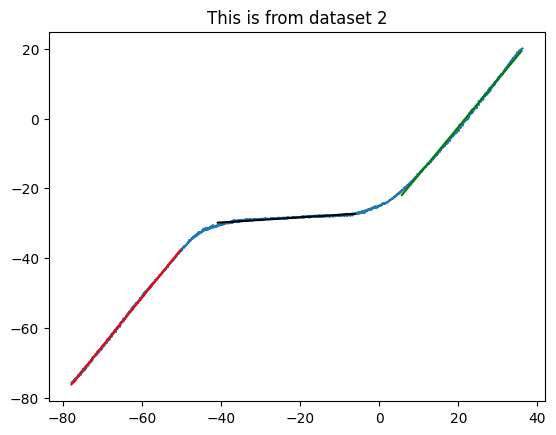

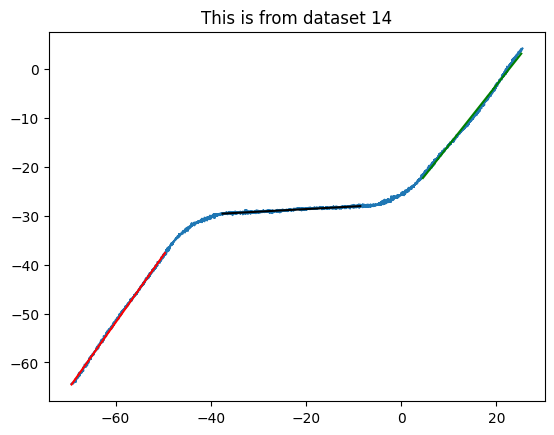

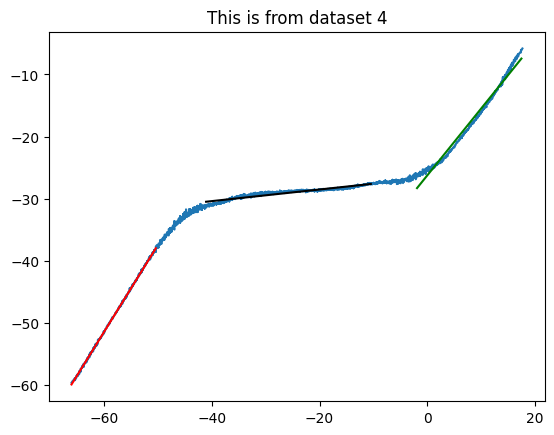

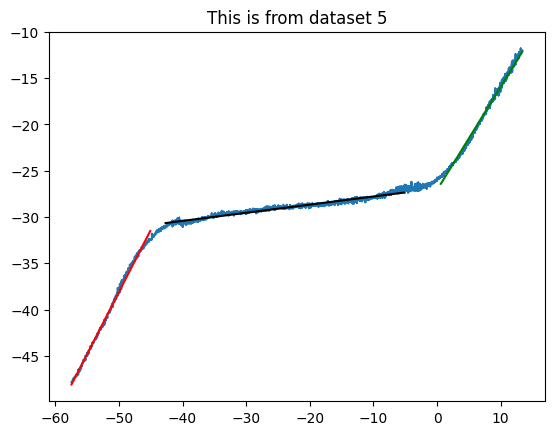

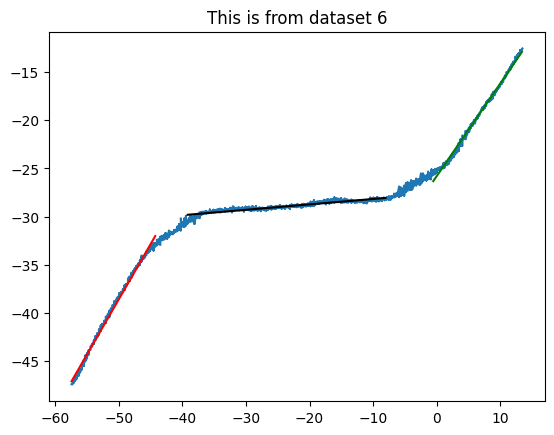

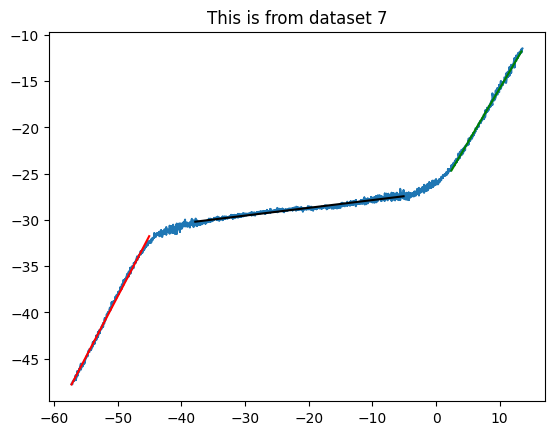

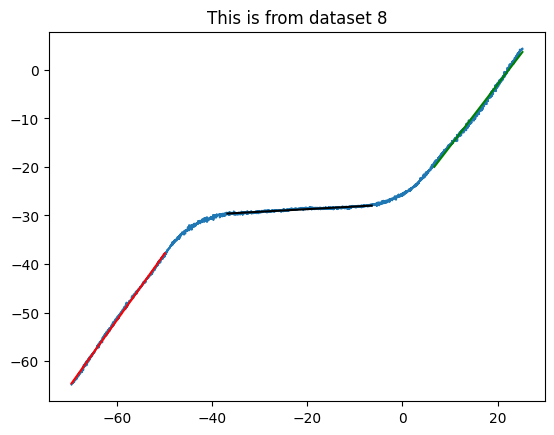

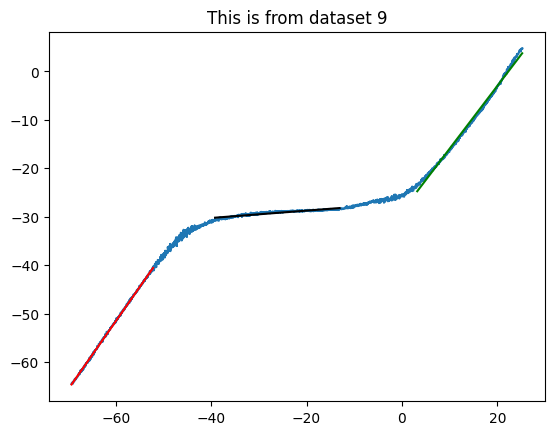

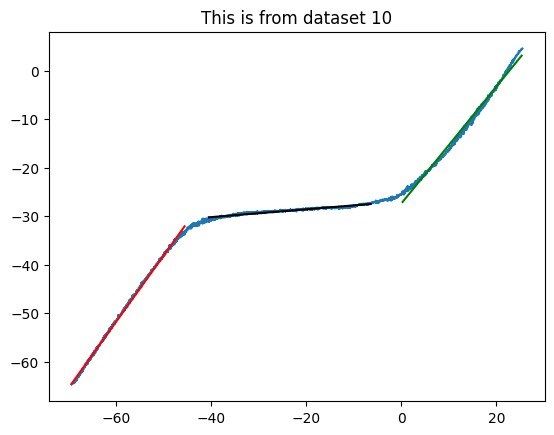

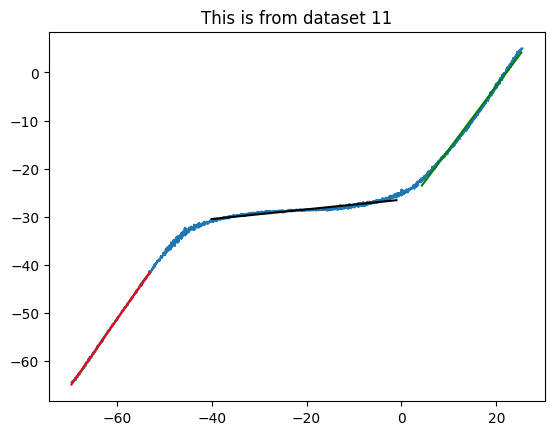

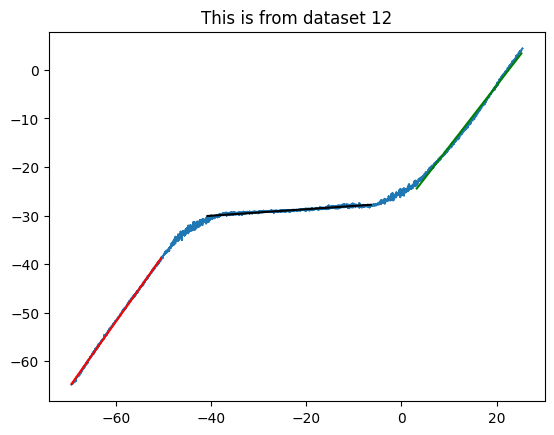

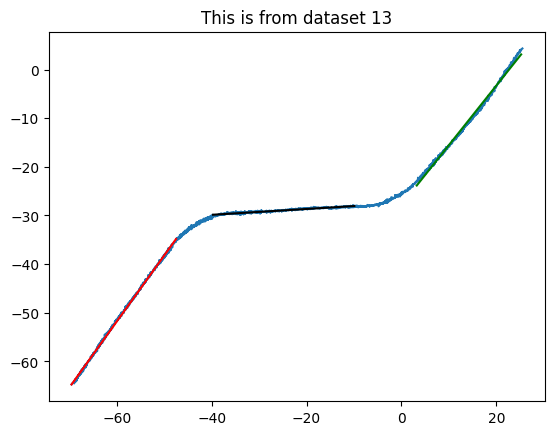

In [24]:
for key in avg_data:
    plt.figure() #create figure
    plt.plot(avg_data[key][1],avg_data[key][2],label='real data') #plot actual values
    plt.plot(avg_data[key][1][regions[key]['neg'][0]:regions[key]['neg'][1]],linear(avg_data[key][1][regions[key]['neg'][0]:regions[key]['neg'][1]],*popt[key]['neg']),'r') #plot linear approximation for negative region
    plt.plot(avg_data[key][1][regions[key]['sc'][0]:regions[key]['sc'][1]],linear(avg_data[key][1][regions[key]['sc'][0]:regions[key]['sc'][1]],*popt[key]['sc']),'k') #plot linear approximation for flat region
    plt.plot(avg_data[key][1][regions[key]['pos'][0]:regions[key]['pos'][1]],linear(avg_data[key][1][regions[key]['pos'][0]:regions[key]['pos'][1]],*popt[key]['pos']),'g') #plot linear approximation for positive region
    plt.title("This is from dataset " + key)
    plt.show() #display figure

This looks really good, now let's calculate the intersection points for all of these graphs.

In [25]:
#to attempt to make this readable lets make a function that does the heavy lifting. This also allows us to determine the uncertainty by the functional method
def linear_intersect(popt1,popt2):#here popt is a list
    delta_b = popt1[1]-popt2[1]
    delta_a = popt1[0]-popt2[0]
    return -(delta_b/delta_a)
#the critical current needs to be found for each dataset
print(len(avg_data))
left_Ic = np.array([])
u_left_Ic1=np.array([])
u_left_Ic2=np.array([])
u_left_Ic3=np.array([])
u_left_Ic4=np.array([])
right_Ic =np.array([])
u_right_Ic1=np.array([])
u_right_Ic2=np.array([])
u_right_Ic3=np.array([])
u_right_Ic4=np.array([])
for key in avg_data:
#    print(key)
    left_Ic = np.append(left_Ic,linear_intersect(popt[key]['neg'],popt[key]['sc']))
    u_left_Ic1 =np.append(u_left_Ic1,linear_intersect(popt[key]['neg']+pcov[key]['neg'],popt[key]['sc']+pcov[key]['sc']))
    u_left_Ic2 =np.append(u_left_Ic2,linear_intersect(popt[key]['neg']+pcov[key]['neg'],popt[key]['sc']-pcov[key]['sc']))
    u_left_Ic3 =np.append(u_left_Ic3,linear_intersect(popt[key]['neg']-pcov[key]['neg'],popt[key]['sc']+pcov[key]['sc']))
    u_left_Ic4 =np.append(u_left_Ic4,linear_intersect(popt[key]['neg']-pcov[key]['neg'],popt[key]['sc']-pcov[key]['sc']))
    right_Ic = np.append(right_Ic,linear_intersect(popt[key]['sc'],popt[key]['pos']))
    u_right_Ic1 =np.append(u_right_Ic1,linear_intersect(popt[key]['pos']+pcov[key]['pos'],popt[key]['sc']+pcov[key]['sc']))
    u_right_Ic2 =np.append(u_right_Ic2,linear_intersect(popt[key]['pos']+pcov[key]['pos'],popt[key]['sc']-pcov[key]['sc']))
    u_right_Ic3 =np.append(u_right_Ic3,linear_intersect(popt[key]['pos']-pcov[key]['pos'],popt[key]['sc']+pcov[key]['sc']))
    u_right_Ic4 =np.append(u_right_Ic4,linear_intersect(popt[key]['pos']-pcov[key]['pos'],popt[key]['sc']-pcov[key]['sc']))
u_left_Ic = np.array([])
u_right_Ic = np.array([])

for i in range(len(u_left_Ic1)):
    max_left_I_c = np.amax(np.array([u_left_Ic1[i],u_left_Ic2[i],u_left_Ic3[i],u_left_Ic4[i]]))
    min_left_I_c = np.amin(np.array([u_left_Ic1[i],u_left_Ic2[i],u_left_Ic3[i],u_left_Ic4[i]]))
    max_right_I_c = np.amax(np.array([u_right_Ic1[i],u_right_Ic2[i],u_right_Ic3[i],u_right_Ic4[i]]))
    min_right_I_c = np.amin(np.array([u_right_Ic1[i],u_right_Ic2[i],u_right_Ic3[i],u_right_Ic4[i]]))
    u_left_Ic = np.append(u_left_Ic,(max_left_I_c-min_left_I_c)/2)
    u_right_Ic = np.append(u_right_Ic,(max_right_I_c-min_right_I_c)/2)
print(u_left_Ic)
print(u_right_Ic)
difference_between_knees=right_Ic-left_Ic
critical_current = difference_between_knees/2
print(critical_current)

13
[0.03074905 0.03632176 0.04156797 0.03460063 0.03861909 0.04646535
 0.03624135 0.04599052 0.03977887 0.04008716 0.04547895 0.03499686
 0.03191128]
[0.05534509 0.080737   0.07551513 0.10779334 0.05605949 0.04804656
 0.04573818 0.08829029 0.10199955 0.09705936 0.09207464 0.07897682
 0.08004723]
[23.04193922 23.54514779 22.14954142 22.48344103 22.36315354 20.25448889
 22.36346933 22.48646256 23.26264818 22.4270902  23.93143176 22.68156639
 22.14183956]
